<a href="https://colab.research.google.com/github/utpalrtw/git-practive/blob/master/Cryptocurrency_prices_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)

##Link: {https://drive.google.com/file/d/1BWG0_wR0iHPqZjvJS17B7WyhQSYvigw3/view?usp=drive_link}

In [10]:
crypto = pd.read_csv('Cryptocurrency Prices by Date.csv')
crypto.head()

,Currency,Date,Price
0,0x,1502892561000,0.111725
1,0x,1502982305000,0.211486
2,0x,1503068692000,0.283789
3,0x,1503155108000,0.511434
4,0x,1503241503000,0.429522


In [11]:
print(f'The dataset has a shape of {crypto.shape}', '\n')
print(f'The dataset has {crypto.isnull().sum().sum()} missing values' , '\n')
print(f'The dataset has {crypto.duplicated().sum()} duplicated rows' , '\n')

The dataset has a shape of (657316, 3) 

The dataset has 0 missing values 

The dataset has 0 duplicated rows 



In [12]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657316 entries, 0 to 657315
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Currency  657316 non-null  object 
 1   Date      657316 non-null  int64  
 2   Price     657316 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ MB


In [13]:
pd.set_option('display.max_rows', None)
#Number of cryptocurrencies
crypto['Currency'].value_counts().sort_values(ascending=False)

,count
Currency,
namecoin,1736
litecoin,1735
bitcoin,1733
feathercoin,1727
novacoin,1727
peercoin,1726
terracoin,1702
bitbar,1692
worldcoin,1686


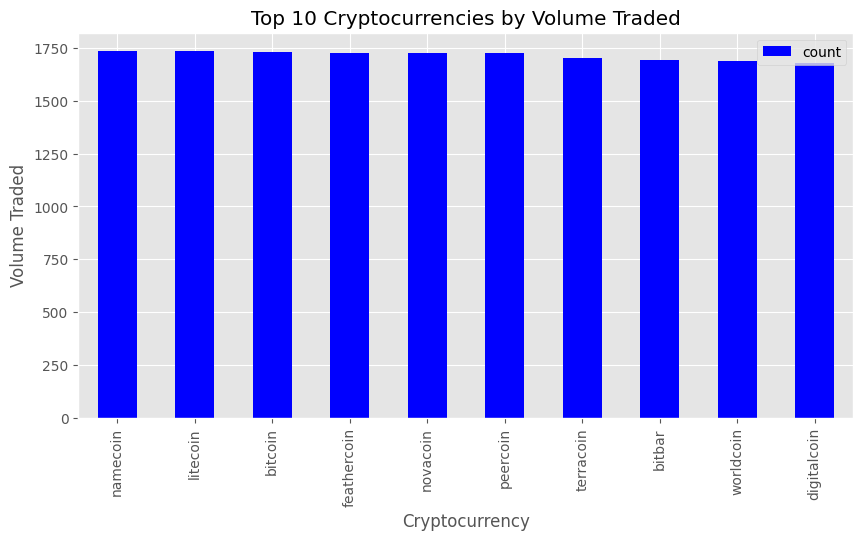

In [14]:
plt.style.use('ggplot')
crypto['Currency'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='blue', figsize=(10,5),title='Top 10 Cryptocurrencies by Volume Traded')
plt.legend()
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume Traded')
plt.show();

In [15]:
#Date column is written in this format 1502892561000 which is the number of milliseconds since 1 January 1970
#Convert the date column to datetime format
crypto['Date'] = pd.to_datetime(crypto['Date'], unit='ms')
#Obtain the year, month, day and time from the date column
crypto['month'] = crypto['Date'].dt.month
crypto['year'] = crypto['Date'].dt.year
crypto['day'] = crypto['Date'].dt.day
crypto['time'] = crypto['Date'].dt.time

crypto['Date'] = crypto['Date'].apply(lambda x: str(x).split(' ')[0])
crypto.head()

,Currency,Date,Price,month,year,day,time
0,0x,2017-08-16,0.111725,8,2017,16,14:09:21
1,0x,2017-08-17,0.211486,8,2017,17,15:05:05
2,0x,2017-08-18,0.283789,8,2017,18,15:04:52
3,0x,2017-08-19,0.511434,8,2017,19,15:05:08
4,0x,2017-08-20,0.429522,8,2017,20,15:05:03


In [16]:
crypto = crypto[['Currency', 'Date', 'month','year','day','time','Price']]
crypto.head()

,Currency,Date,month,year,day,time,Price
0,0x,2017-08-16,8,2017,16,14:09:21,0.111725
1,0x,2017-08-17,8,2017,17,15:05:05,0.211486
2,0x,2017-08-18,8,2017,18,15:04:52,0.283789
3,0x,2017-08-19,8,2017,19,15:05:08,0.511434
4,0x,2017-08-20,8,2017,20,15:05:03,0.429522


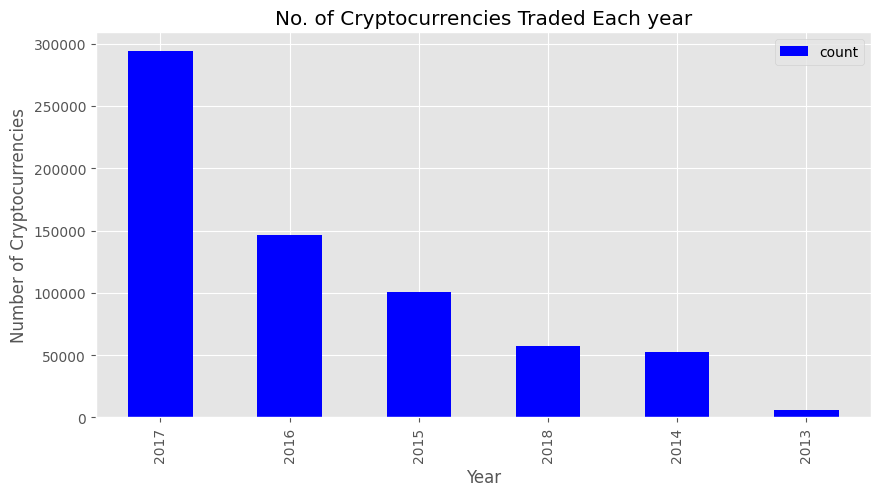

In [17]:
crypto['year'].value_counts().sort_values(ascending=False).plot(kind='bar',color='blue',figsize=(10,5), title='No. of Cryptocurrencies Traded Each year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

<Axes: title={'center': 'Top 10 Cryptocurrencies Traded in 2017'}, xlabel='Currency'>

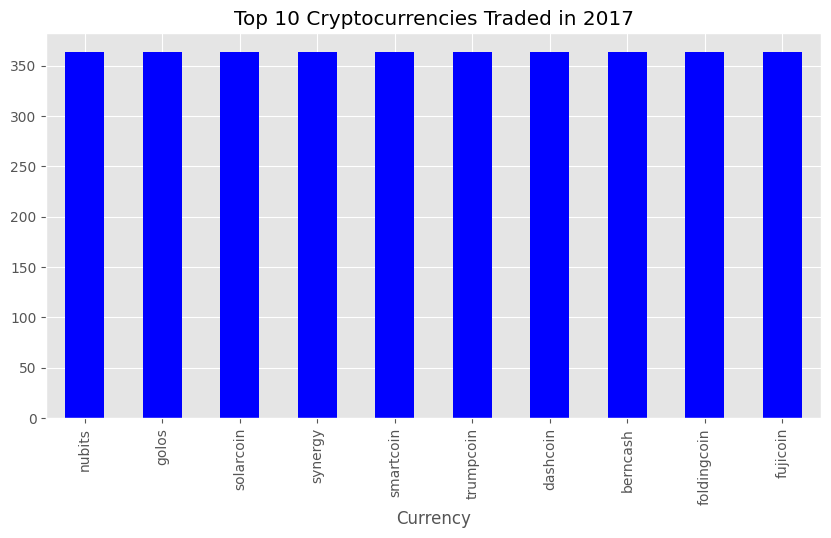

In [18]:
#2017 cryptocurrency trade
crypto[crypto['year'] == 2017]['Currency'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue',figsize=(10,5),title='Top 10 Cryptocurrencies Traded in 2017')


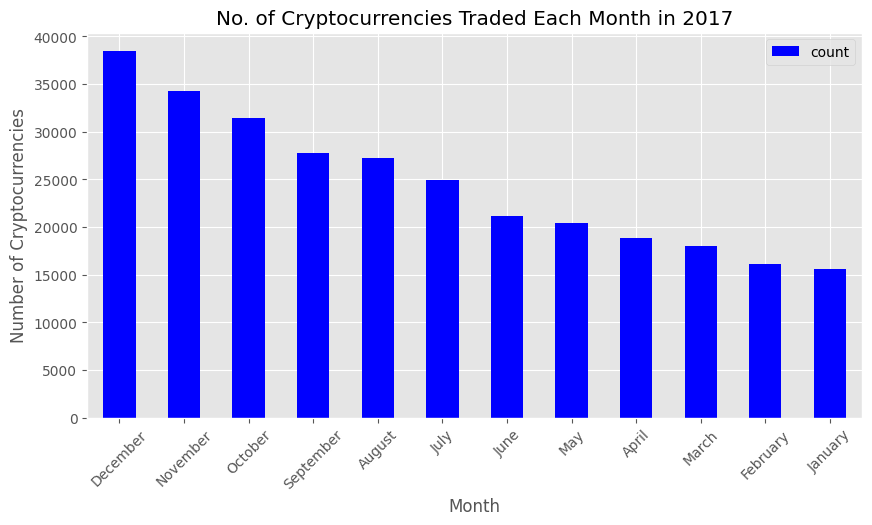

In [19]:
crypto_17 = crypto.query('year == 2017')
#Plot the number of cryptocurrncies traded each month in 2017
crypto_17['month'].value_counts().sort_values(ascending=False).plot(kind='bar',color='blue',figsize=(10,5),title='No. of Cryptocurrencies Traded Each Month in 2017')
plt.legend()
#Replace xticks with month names in reverse order
plt.xticks(np.arange(12), ('December', 'November','October','September','August','July','June','May','April','March','February','January'),rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

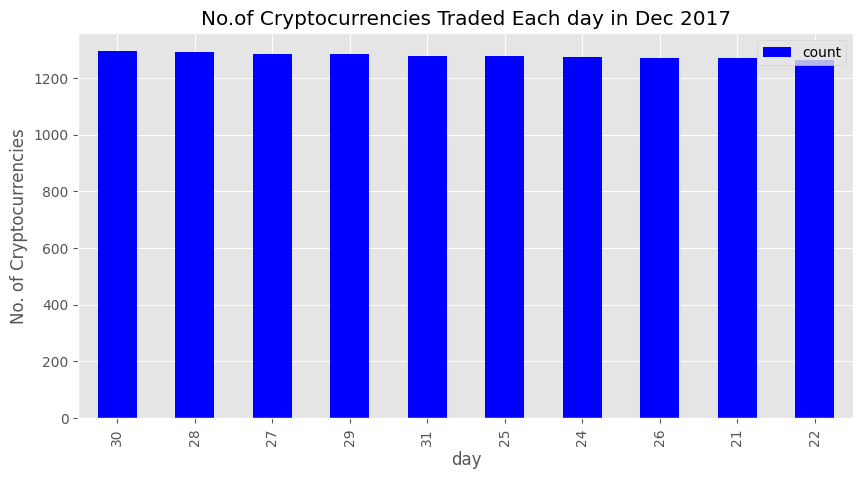

In [20]:
#Which Day in Dec 2017 had the most cryptocurrencies traded?
crypto_17[crypto_17['month'] == 12]['day'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue',figsize=(10,5),title='No.of Cryptocurrencies Traded Each day in Dec 2017')
plt.legend()
plt.xlabel('day')
plt.ylabel('No. of Cryptocurrencies')
plt.show();



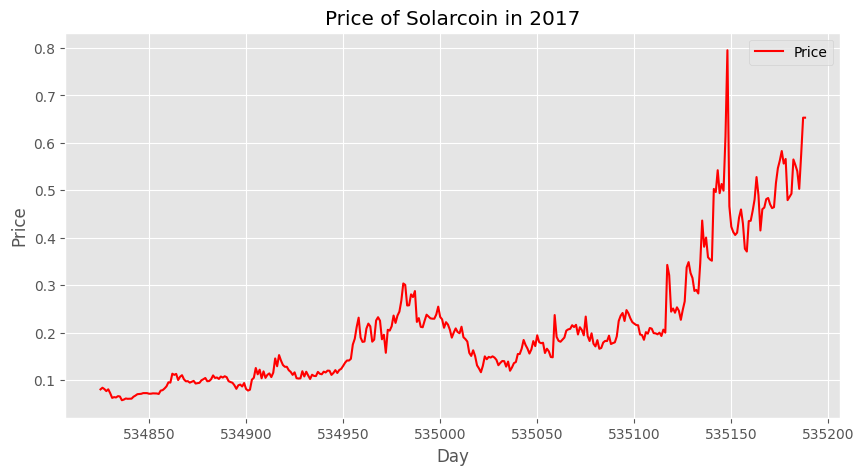

In [21]:
# Price of Solarcoin in 2017
crypto_17[crypto_17['Currency'] == 'solarcoin']['Price'].plot(kind='line', color='r', figsize=(10, 5), title='Price of Solarcoin in 2017')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

<Axes: title={'center': 'Price v Date Total'}, xlabel='Date'>

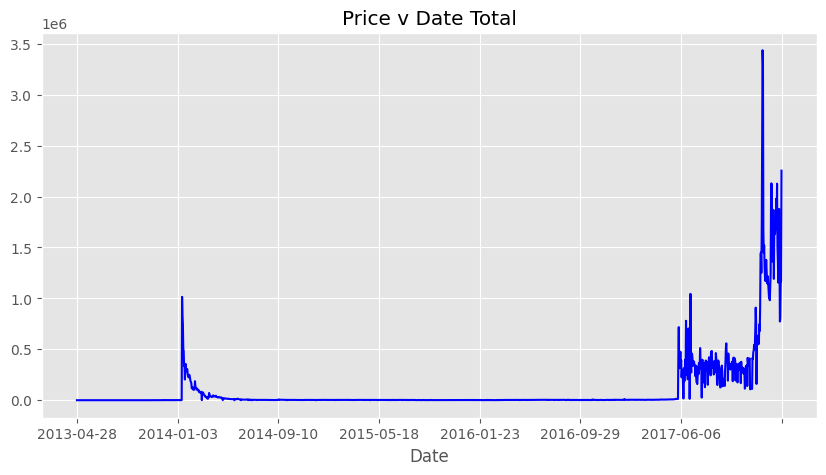

In [22]:
# Price v date total
crypto.groupby('Date')['Price'].sum().plot(kind='line', color='b', figsize=(10, 5), title='Price v Date Total')

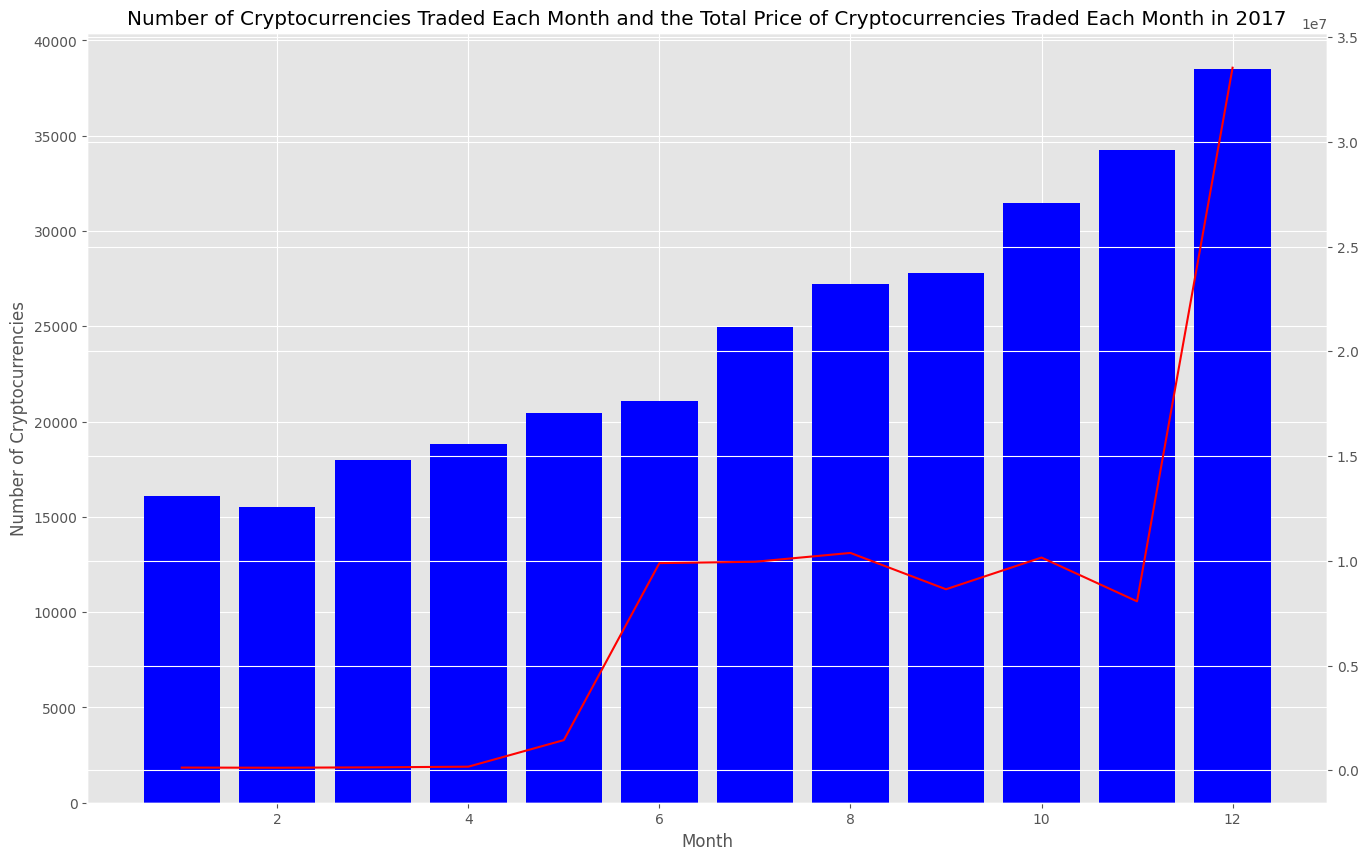

In [23]:
# A combo of a bar and line plot to show the number of cryptocurrencies traded each month in 2017 and the total price of cryptocurrencies traded each month in 2017
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()
ax1.bar(crypto_17['month'].value_counts().sort_values(ascending=False).index, crypto_17['month'].value_counts().sort_values(ascending=False).values, color='b')
ax2.plot(crypto_17.groupby('month')['Price'].sum(), color='r')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Cryptocurrencies')
ax1.set_xlabel('Month')
#ax2.set_ylabel('Total Price')
plt.title('Number of Cryptocurrencies Traded Each Month and the Total Price of Cryptocurrencies Traded Each Month in 2017');

<Axes: >

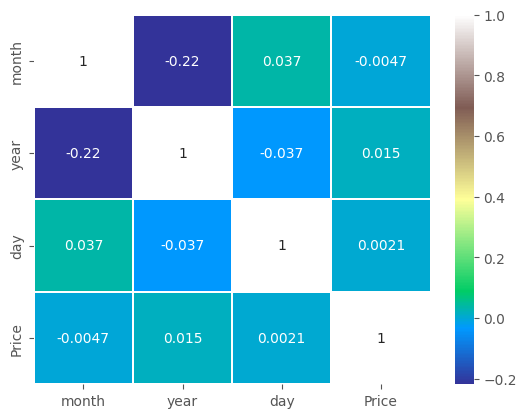

In [26]:
# Convert 'Price' column to numeric, handling non-numeric values
crypto['Price'] = pd.to_numeric(crypto['Price'], errors='coerce')

# Plot the correlation heatmap, excluding non-numeric columns
sns.heatmap(crypto.select_dtypes(include=['number']).corr(), annot=True, cmap='terrain', linewidths=0.2)

In [27]:
#Select two specific cryptocurrencies for hypothesis testing
bitcoin_prices = crypto[crypto['Currency'] == 'bitcoin']['Price']
ethereumcoin_prices = crypto[crypto['Currency'] == 'ethereum']['Price']

Hypothesis Testing: Bitcoin vs Ethereumcoin
T-Statistic: 13.591758389941736
P-Value: 1.0080870726092734e-40


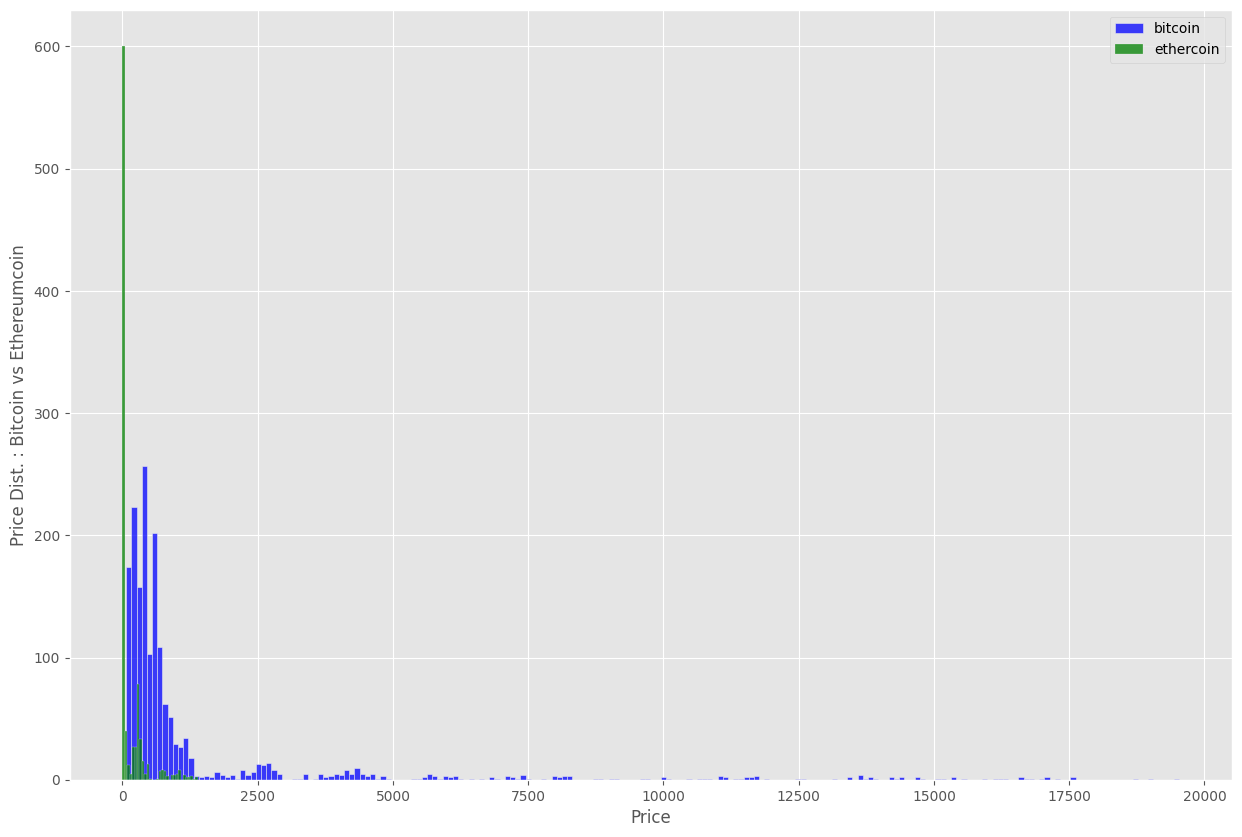

In [28]:
#Perform a t-test to compare the mean prices of Bitcoin and Ethereum
t_stat , p_value = ttest_ind(bitcoin_prices, ethereumcoin_prices)
print('Hypothesis Testing: Bitcoin vs Ethereumcoin')
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

plt.figure(figsize=(15,10))
sns.histplot(bitcoin_prices, color= 'blue', label='bitcoin')
sns.histplot(ethereumcoin_prices, color= 'green', label='ethercoin')
plt.xlabel('Price')
plt.ylabel('Price Dist. : Bitcoin vs Ethereumcoin')
plt.legend()
plt.show()

In [29]:
bitcoin = crypto[crypto['Currency'] == 'bitcoin'].copy()

In [30]:
from numpy.random import choice
from numpy import *
from matplotlib.pyplot import *
import scipy.stats as stats

In [31]:
bitcoin.describe().Price

,Price
count,1733.000000
mean,1436.394988
std,2883.248598
min,67.809000
25%,274.517000
50%,480.770000
75%,853.010000
max,19535.700000


In [32]:
bitprice = bitcoin['Price'].to_numpy()

In [33]:
bitprice

array([ 135.3 ,  141.96,  135.3 , ..., 8179.93, 8003.77, 9037.51])

In [34]:
n_sample = 175
sample= choice(bitprice, n_sample, replace= False)

In [35]:
sample

array([   99.99  ,  1030.47  ,  6252.44  ,   589.081 ,   485.551 ,
          68.0831,   781.489 ,   319.693 ,   891.942 ,   230.925 ,
          77.    ,   232.025 , 17600.3   ,   274.168 ,   323.655 ,
         310.6   ,   102.443 ,   324.769 ,   416.66  ,  4577.31  ,
         346.825 ,   240.201 ,   585.466 ,   511.395 ,   427.452 ,
        4314.11  ,   224.714 ,   620.055 ,   392.849 ,   102.    ,
        2539.78  ,   361.606 ,   571.571 ,   227.961 ,   125.79  ,
         121.9   ,   644.602 ,   865.46  ,  2521.61  ,   216.48  ,
         106.55  ,   131.7   ,  4390.45  ,   580.799 ,   455.797 ,
         361.012 ,   544.418 ,   771.15  ,   919.1   ,   421.726 ,
         105.841 ,   245.58  ,   104.4   ,   395.493 ,   610.381 ,
         233.695 ,   218.892 ,   485.565 ,   259.816 ,   385.471 ,
         589.439 ,   850.35  ,   597.254 ,   287.823 ,   569.327 ,
         384.461 ,   438.286 ,   369.096 ,   209.398 ,   655.21  ,
        2635.36  ,   438.633 ,   516.599 ,   671.42  , 18737.6

In [36]:
def collect_sample(data, n_sample, n_choice):
    avgs = zeros(n_choice)
    for i in range(n_choice):
        sample = choice(data, n_sample, replace=False)
        avgs[i] = mean(sample)
    return avgs

In [37]:
avgs = collect_sample(bitprice, n_sample,200)

In [38]:
avgs

array([1105.59672286, 1564.27521714, 1044.03493543, 1474.47315429,
       1655.67106286, 1641.04332971, 1632.22714914, 1500.66549143,
       1180.42533943, 1418.81231657, 1310.25726343, 1695.01252343,
       1600.01014971, 1400.54666857, 1586.23789543, 1599.15352914,
       1542.59483429, 1144.760292  , 1397.41637143, 1162.99988571,
       1655.702032  , 1187.68429086, 1133.695412  , 1857.54499886,
       1285.14288   , 1433.13854171, 1408.50812686, 1431.34752514,
       1560.75480457, 1525.16501829, 1611.72241486, 1105.68723886,
       1743.600512  , 1392.00751371, 1513.41237771, 1506.66368343,
       1350.19542286, 1370.614856  , 1699.48089143, 1716.03734286,
       1553.47758857, 1429.19061143, 1285.173068  , 1297.70458343,
       1139.31805714, 1253.52686857, 1629.44729886, 1694.85506286,
       1463.57340343, 1315.02754514, 1546.71130286, 1580.37022514,
       1339.93772571, 1615.81875429, 1411.11802343, 1248.58176686,
       1349.70299257, 1381.42181657, 1182.72516571, 1497.15817

(array([ 2.,  6., 10., 13.,  9., 16., 16., 26., 15., 26., 17., 15., 11.,
         6.,  4.,  3.,  1.,  1.,  2.,  1.]),
 array([1020.00446114, 1072.25631509, 1124.50816903, 1176.76002297,
        1229.01187691, 1281.26373086, 1333.5155848 , 1385.76743874,
        1438.01929269, 1490.27114663, 1542.52300057, 1594.77485451,
        1647.02670846, 1699.2785624 , 1751.53041634, 1803.78227029,
        1856.03412423, 1908.28597817, 1960.53783211, 2012.78968606,
        2065.04154   ]),
 <BarContainer object of 20 artists>)

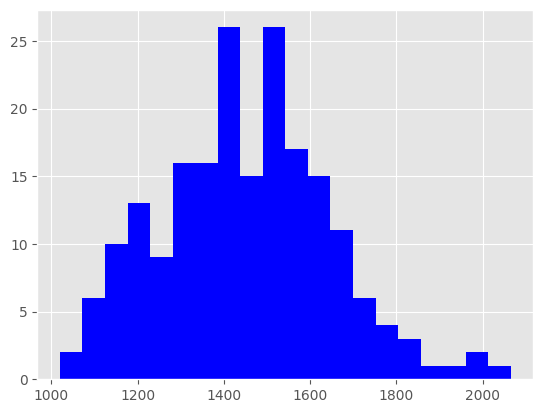

In [39]:
hist(avgs, bins=20,color='b')

